## Label representation
The first step is to determine label representation. If treat the play count as a linear scale, the performance may be negatively affected if there are long tale distribution. Check if there is such distribution.

module://matplotlib_inline.backend_inline


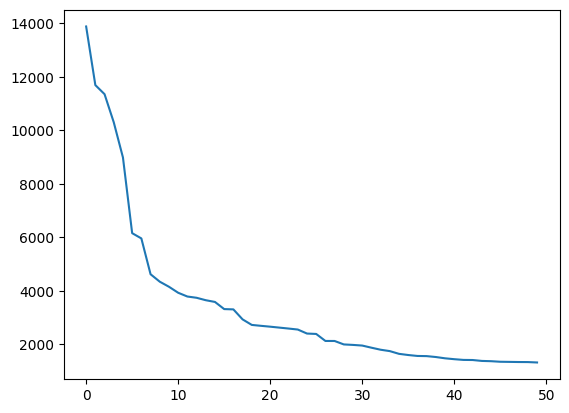

module://matplotlib_inline.backend_inline


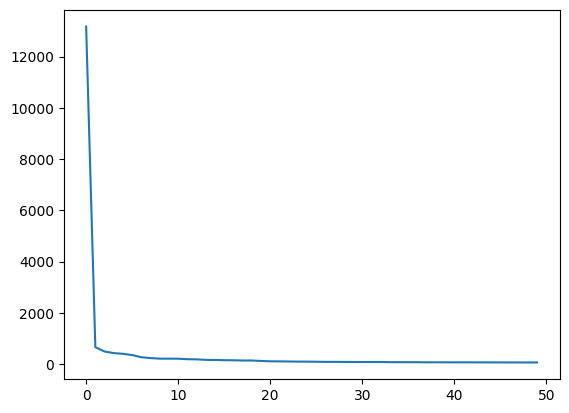

In [1]:
import os
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


def visualize_user_artist_play_count(id):
    df = pd.read_csv('./data/lastfm-2k/user_artists.dat', sep='\t')
    cnt = []
    for index, row in df.iterrows():
        if row['userID'] == id:
            cnt.append(row['weight'])
    plt.plot(cnt)
    plt.show()


visualize_user_artist_play_count(2)
visualize_user_artist_play_count(3)

The long-tale distribution is kind of typical. So as a better option, we normalize all the play count with log, and scale to [0,1]

/var/folders/ss/tvdg7d2j2kbcy29zy3t5f4580000gn/T/ipykernel_30427/4121893888.py:27: RuntimeWarning: invalid value encountered in double_scalars
  score = weight_normalized / user_nor_max


   userID  artistID  weight  weight_normalized     score
0       2        51   13883           9.538420  1.000000
1       2        52   11690           9.366489  0.981975
2       2        53   11351           9.337061  0.978890
3       2        54   10300           9.239899  0.968703
4       2        55    8983           9.103089  0.954360


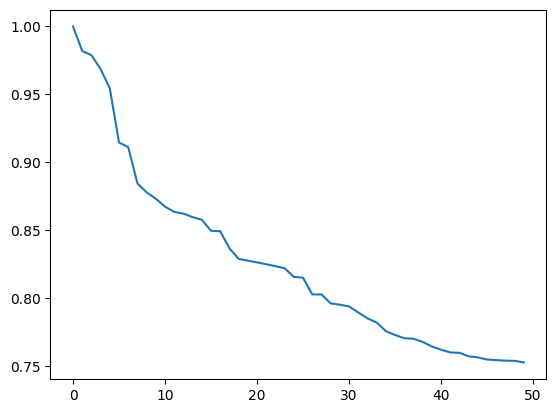

In [10]:
import numpy as np

df = pd.read_csv('./data/lastfm-2k/user_artists.dat', sep='\t')
users = df['userID']
play_cnts = df['weight']
normalized_cnts = []
user_normalized = {}
for u, i in zip(users, play_cnts):
    nor_cnt = np.log(i)
    normalized_cnts.append(nor_cnt)
    if u not in user_normalized:
        user_normalized[u] = [nor_cnt]
    else:
        user_normalized[u].append(nor_cnt)
user_normalized_max = {}
for id in user_normalized:
    t = max(user_normalized[id])
    user_normalized_max[id] = t
df['weight_normalized'] = normalized_cnts

# add the 'score' column
scores = []
for index, row in df.iterrows():
    user_id = row['userID']
    weight_normalized = row['weight_normalized']
    user_nor_max = user_normalized_max[user_id]
    score = weight_normalized / user_nor_max
    scores.append(score)
df['score'] = scores

print(df.head())

cnt = []
for index, row in df.iterrows():
    if row['userID'] == 2:
        cnt.append(row['score'])
plt.plot(cnt)
plt.show()


OK, things get much better. Save the normalized data to file.

In [12]:
df.to_csv('./data/user_artist_play.csv', index=False)